## Importamos librerias de python y CSV

Se utilizará pandas para la manipulación de CSV, numpy para funciones matematicas, plotly para visualizar la información y math para pequeñas funciones


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import math
ruta_archivo = 'C:/Users/Vicente/Desktop/Datos osciloscopio/prueba prototype 2/socket 1/12 cm/12 cm.csv'
datos = pd.read_csv(ruta_archivo)
#2 columnas por evento y una cantidad de filas equivalente a los puntos por evento

## Graficamos pulsos individualmente

Esto se hace con el objetivo de identificar pulsos y empezar a corregir baseline y orientación de pulsos.

In [2]:
#Visualización de pulsos individuales
Pulse = 6246
#graficamos el pulso sin corregir
fig = px.scatter(datos, title = "PULSE", x=datos.iloc[:,2*Pulse], y=datos.iloc[:,2*Pulse+1])
fig.show()
datos_positivos = datos.iloc[:,2*Pulse+1].apply(lambda x : x*-1)
#identificamos el baseline y lo corregimos
mean_baseline = datos_positivos[:1000].mean()
datos_corregidos = datos_positivos.apply(lambda x : x-mean_baseline)
#Integramos con el metodo trapezoid de numpy
integral = np.trapezoid(datos_corregidos,datos.iloc[:,2*Pulse])
#Graficamos el pulso corregido
fig = px.scatter(datos, title = "CORRECTED PULSE", x=datos.iloc[:,2*Pulse], y=datos_corregidos)
fig.show()
integral

np.float64(-4.480584757626266e-09)

## Superponer todos los pulsos

Se realiza un submuestreo para graficar totos los pulsos superpuestos, esto otorgará una idea de dónde inicican los pulsos y de donde parte el baseline

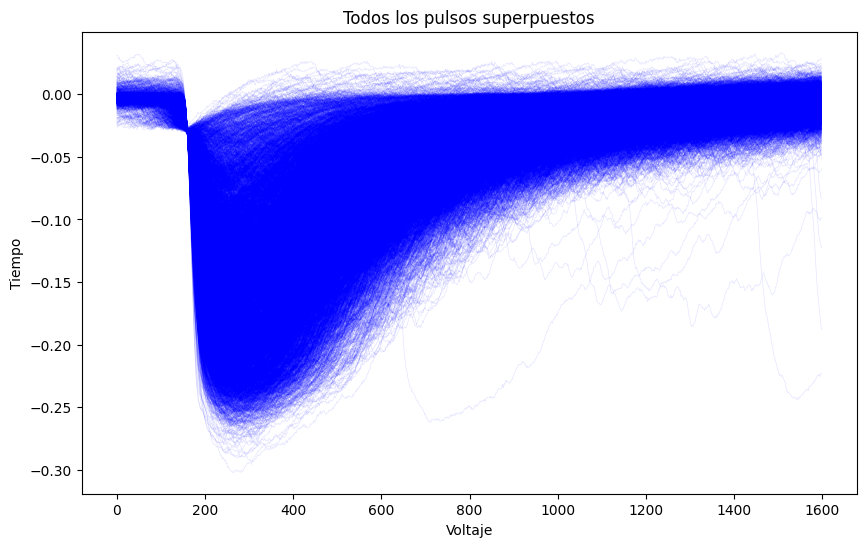

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
cantidad_de_pulsos = 6249
puntos_originales = 15998  # Número original de puntos en cada pulso
factor_submuestreo = 10  # Factor por el cual se reducirán los datos
pulsos_a_graficar = 100  # Reduce la cantidad de pulsos a graficar para aligerar la imagen

# Inicializa la figura
plt.figure(figsize=(10, 6))

# Submuestreo dinámico con menos pulsos
for i in range(cantidad_de_pulsos):
    Pulse = i
    y_original = datos.iloc[:, 2*Pulse+1].values
    # Submuestreo: asegura que todos los pulsos tienen la misma cantidad de puntos submuestreados
    y_values_reducidos = y_original[:puntos_originales - (puntos_originales % factor_submuestreo):factor_submuestreo]
    x_values = np.arange(len(y_values_reducidos))
    
    # Agrega los datos al gráfico
    plt.plot(x_values, y_values_reducidos, color='blue', alpha=0.1, linewidth=0.5)

# Etiquetas y título
plt.title('Todos los pulsos superpuestos')
plt.xlabel('Voltaje')
plt.ylabel('Tiempo')

# Mostrar la figura
plt.show()




## Histograma de cargas

Se realiza un histograma de las cargas que cada pulso posee y se presentan en forma de histograma. Tambien se separan lso pulsos que tengan un baseline muy disperso y se imprime el promedio y la desviación estandar de los pulsos

In [4]:
#integrales
Cantidad_de_pulsos = 6249
lista_integrales = []
lista_integrales_negativas = []


for i in range(Cantidad_de_pulsos):
    Pulse = i
    datos_positivos = datos.iloc[:,2*Pulse+1].apply(lambda x : x*-1)
    #identificamos el baseline
    mean_baseline = datos_positivos[:1000].mean()
    datos_corregidos = datos_positivos.apply(lambda x : x-mean_baseline)
    #Integramos con el metodo trapezoid de numpy
    integral = np.trapezoid(datos_corregidos[1500:],datos.iloc[1500:,2*Pulse])
    integral = integral/50 *10**12
    if integral >= 0:
        lista_integrales.append(integral)
    if integral < 0:
        lista_integrales_negativas.append(Pulse)


def crear_histograma(datos, titulo='Histograma', nbins=10):

    fig = px.histogram(datos, nbins=nbins, title=titulo)
    fig.update_layout(xaxis_title='Carga en picoCoulomb', yaxis_title='Frecuencia')
    fig.show()
    

mean_integral = np.mean(lista_integrales)
std_integral = np.std(lista_integrales)
crear_histograma(lista_integrales, titulo='Distribución de carga', nbins=2*math.trunc(math.sqrt(Cantidad_de_pulsos)))
print("El promedio de esta distribución de carga es:", mean_integral)
print("La desviación estandar es:",std_integral)

El promedio de esta distribución de carga es: 891.0125504845943
La desviación estandar es: 437.9610486649005


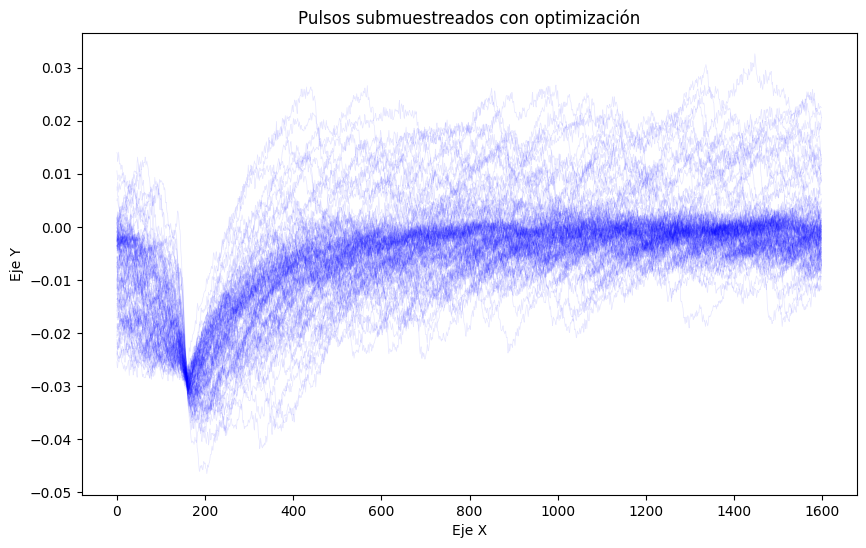

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
cantidad_de_pulsos = 6249
puntos_originales = 15998  # Número original de puntos en cada pulso
factor_submuestreo = 10  # Factor por el cual se reducirán los datos
pulsos_a_graficar = 100  # Reduce la cantidad de pulsos a graficar para aligerar la imagen

# Inicializa la figura
plt.figure(figsize=(10, 6))

# Submuestreo dinámico con menos pulsos
for i in lista_integrales_negativas:
    Pulse = i
    y_original = datos.iloc[:, 2*Pulse+1].values
    # Submuestreo: asegura que todos los pulsos tienen la misma cantidad de puntos submuestreados
    y_values_reducidos = y_original[:puntos_originales - (puntos_originales % factor_submuestreo):factor_submuestreo]
    x_values = np.arange(len(y_values_reducidos))
    
    # Agrega los datos al gráfico
    plt.plot(x_values, y_values_reducidos, color='blue', alpha=0.1, linewidth=0.5)

# Etiquetas y título
plt.title('Pulsos descartados')
plt.xlabel('Tiempo')
plt.ylabel('Voltaje')

# Mostrar la figura
plt.show()
